In [6]:
%matplotlib inline
import astropy
from astropy.io import fits
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from  matplotlib.pyplot import *



In [7]:
def write_v44_catalog(field, cat_fname, header_str, zp_filters, zp_corrections, catalog_temp, cat_plus):
    cat_new = catalog_temp.copy()
    print (shape(cat_new))
    f = open(cat_fname, 'w+')
    colnames = array(header_str.lstrip('# ').split(' '))
    
    for ff, filt in enumerate(zp_filters):
        g = where(colnames == 'f_' + filt)[0][0]
        zp = zp_corrections[ff]
        gd = where(catalog_temp[:,g].astype('float') !=-99)[0]
        cat_new[gd,g] = array(['%.8f'%(float(m) * zp) for m in catalog_temp[gd,g]])
        cat_new[gd,g+1] = array(['%.8f'%(float(m) * zp) for m in catalog_temp[gd,g+1]])

    for i in arange(len(cat_new), len(cat_plus)):
        if field == 's': temp_arr = cat_plus[i, 0:shape(cat_new)[1]]
        elif field == 'n': temp_arr = concatenate([cat_plus[i, 0:shape(cat_new)[1]], array(['-99', '-99', '-99', '-99'])])
        cat_new = concatenate([cat_new, array([temp_arr])], axis = 0)
        
    f.write(header_str + '\n# goods%s_3dhst.v4.4.cat\n'%field)

    
    for i in arange(cat_new.shape[0]):
        for j in arange(cat_new.shape[1]):
            f.write(cat_new[i,j] + ' ')
        f.write('\n')


        
    f.close()
    
    return


In [8]:
for field in ['s']:
    zp_filters = np.loadtxt('zp_v44_gd%s'%field, usecols = (0,), dtype = 'str')
    zp_corrections = np.loadtxt('zp_v44_gd%s'%field, usecols = (1))
    catalog_temp = np.loadtxt('/Users/rsimons/Desktop/clear/Catalogs/goods%s_3dhst_temp.v4.3.cat'%field, dtype = 'str')  
    cat_fname = '/Users/rsimons/Desktop/clear/Catalogs/goods%s_3dhst.v4.4.cat'%field
    header_str = np.loadtxt('/Users/rsimons/Desktop/clear/Catalogs/goods%s_3dhst_temp.v4.3.cat'%field, comments = '%', dtype = 'str', delimiter = 'asdalksd')[0]
    cat_plus = np.loadtxt('/Users/rsimons/Desktop/clear/Catalogs/Goods%s_plus.cat'%field.upper(), dtype = 'str') 
    
    write_v44_catalog(field, cat_fname, header_str, zp_filters, zp_corrections, catalog_temp, cat_plus)
    print (cat_plus[len(catalog_temp),0])


(50507, 144)
5416401


/anaconda2/envs/grizli/lib/python3.5/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/anaconda2/envs/grizli/lib/python3.5/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


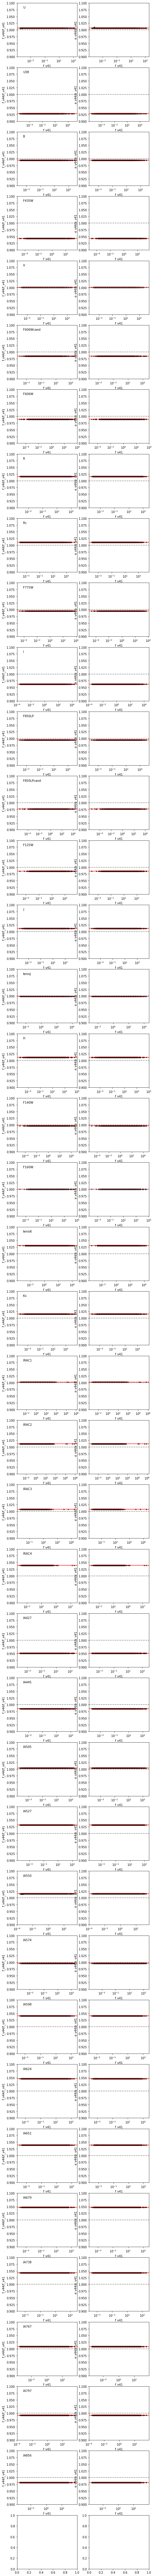

In [9]:

for f, field in enumerate(array(['s'])):
    cat_old = np.loadtxt('/Users/rsimons/Desktop/clear/Catalogs/goods%s_3dhst.v4.1.cats/Catalog/goods%s_3dhst.v4.1.cat'%(field, field))
    cat_new = np.loadtxt('/Users/rsimons/Desktop/clear/Catalogs/goods%s_3dhst.v4.4.cat'%field)    
    header_str = np.loadtxt('/Users/rsimons/Desktop/clear/Catalogs/goods%s_3dhst_temp.v4.3.cat'%field, comments = '%', dtype = 'str', delimiter = 'asdalksd')[0]
    colnames = array(header_str.lstrip('# ').split(' '))
    zp_corrections = np.loadtxt('zp_v44_gd%s'%field, usecols = (1))
    zp_filters = np.loadtxt('zp_v44_gd%s'%field, usecols = (0,), dtype = 'str')
    fig, axes = plt.subplots(len(zp_filters), 2, figsize = (8, 4*len(zp_filters)))
    for ff, filt in enumerate(zp_filters):
        zp = zp_corrections[ff]
        if filt != 'F105W':
            g = where(colnames == 'f_' + filt)[0][0]
            fold = cat_old[:,g]
            fnew = cat_new[0:len(cat_old),g]
            eold = cat_old[:,g+1]
            enew = cat_new[0:len(cat_old),g+1]
            axes[ff,0].plot(fold, fnew/fold,'k.')
            axes[ff,1].plot(fold, enew/eold,'k.')
            axes[ff,0].annotate(filt, (0.1, 0.9), xycoords = 'axes fraction')            
            axes[ff,0].set_ylabel('f_v44/f_v41')
            axes[ff,0].set_xlabel('f_v41')
            axes[ff,1].set_ylabel('e_v44/e_v41')
            axes[ff,1].set_xlabel('f_v41')
            
            for ax in axes[ff]:
                ax.axhline(y = zp, color = 'red', linestyle = '-')
                ax.set_ylim(0.90, 1.10)
                ax.set_xscale('log')
                ax.axhline(y = 1, color = 'grey', linestyle = '--')
    fig.subplots_adjust(wspace = 0.2)
    fig.savefig('v44_v41_GOODS-%s.png'%field.upper(), dpi = 300)
    
    
    
    
    
    

In [36]:
zp_filters

array(['U', 'U38', 'B', 'F435W', 'V', 'F606Wcand', 'F606W', 'R', 'Rc',
       'F775W', 'I', 'F850LP', 'F850LPcand', 'F125W', 'J', 'tenisJ', 'H',
       'F140W', 'F160W', 'tenisK', 'Ks', 'IRAC1', 'IRAC2', 'IRAC3',
       'IRAC4', 'IA427', 'IA445', 'IA505', 'IA527', 'IA550', 'IA574',
       'IA598', 'IA624', 'IA651', 'IA679', 'IA738', 'IA767', 'IA797',
       'IA856', 'F105W'], dtype='<U10')

In [7]:
x = array(['' for i in arange(104)])

In [22]:
shape(cat_plus)

(39005, 100)

In [11]:
y = concatenate([catalog_temp, array([x]))

SyntaxError: invalid syntax (<ipython-input-11-b1d22c704c42>, line 1)

In [ ]:
x = array([x])

In [ ]:
x.shape